In [5]:
import scipy
import numpy
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
from matplotlib.colors import LogNorm
from __future__ import division
from scipy import ndimage
import scipy.fftpack
import pylab
from scipy import pi


from scipy import sparse
from scipy.sparse.linalg import spsolve
def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in xrange(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z

In [12]:
exp1 = np.fromfile('D://Figures+data//m.dat',dtype=float,count=-1, sep=" ")
exp1 = np.reshape(exp1, (161, 201))
exp1=np.transpose(exp1)
#exp3 = np.fromfile('D://Figures+data//m2.dat',dtype=float,count=-1, sep=" ")
#exp3 = np.reshape(exp3, (99, 1001))
#exp3=np.transpose(exp3)


#for i in xrange(46):
#    dat=baseline_als(exp3[i],10000,0.0001,100)
#    exp3[i]=exp3[i]-dat
for i in xrange(201):
    dat=baseline_als(exp1[i],10000,0.0001,100)
    exp1[i]=exp1[i]-dat

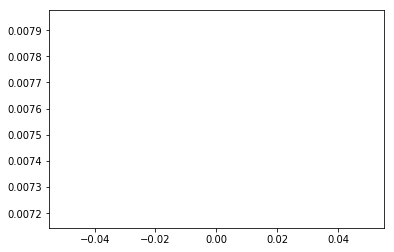

In [13]:
plt.plot(exp3[46])

TypeError: Invalid dimensions for image data

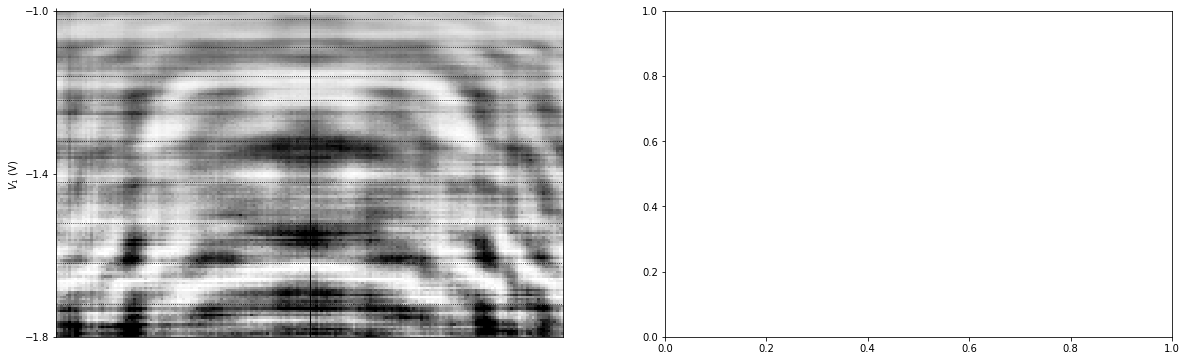

In [22]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(5,3)
gs.update(left=0, right=1.5, wspace=-0.2, hspace=1)
fig = plt.figure(figsize=(20, 6),facecolor='white')
ax1  = fig.add_subplot(121)   

cf=plt.imshow(np.transpose(exp1)*1E9, interpolation='none', aspect='auto',
           extent=[-32,28,-1.8,-0.9],vmax=1,cmap='Greys')

plt.ylabel("$V_1$ (V)",color='k',fontsize=10)
#plt.xlabel("$B$ (mT)",fontsize=10)


xt=np.linspace(-40, 40, num=2)
plt.xticks([-28,0,28], fontsize = 10)
plt.xlim(-28,28)
plt.ylim(-1.8,-1)
plt.tick_params(labeltop=False, labelbottom=False, bottom=False, top=True, labelleft=True)
yt=np.linspace(-1.8, -0.9, num=4)
plt.yticks(np.arange(yt.min(), yt.max(),0.4))
plt.yticks([-1.8,-1.4,-1], fontsize = 10)
#plt.axvline(x=-16, color='k', linestyle='dashed',lw=1)
#plt.axvline(x=16, color='k', linestyle='dashed',lw=1)
plt.axvline(x=0, color='k', linestyle='-',lw=1)
plt.axhline(y=-1.72, color='k', linestyle='dotted',lw=0.8)
plt.axhline(y=-1.62, color='k', linestyle='dotted',lw=0.8)
plt.axhline(y=-1.52, color='k', linestyle='dotted',lw=0.8)
plt.axhline(y=-1.42, color='k', linestyle='dotted',lw=0.8)
plt.axhline(y=-1.32, color='k', linestyle='dotted',lw=0.8)
plt.axhline(y=-1.22, color='k', linestyle='dotted',lw=0.8)
plt.axhline(y=-1.16, color='k', linestyle='dotted',lw=0.8)
plt.axhline(y=-1.09, color='k', linestyle='dotted',lw=0.8)
plt.axhline(y=-1.02, color='k', linestyle='dotted',lw=0.8)
#plt.savefig('D:\\b1.pdf',bbox_inches='tight', format='png')
ax2  = fig.add_subplot(122)   

cf=plt.imshow(exp3*1E9, interpolation='none', aspect='auto',
           extent=[-100,100,0,-2],vmax=1,vmin=0,cmap='Greys')

plt.ylabel("$V_2$ (V)",color='k',fontsize=10)
plt.xlabel("$B$ (mT)",fontsize=10)


#cb = plt.colorbar(cf,ticks=[ 0, 1.6])



xt=np.linspace(-40, 40, num=2)
plt.xticks([-28,0,28], fontsize = 10)
plt.xlim(-28,28)
plt.ylim(-1.8,-1)
plt.tick_params(labeltop=False, labelbottom=True, bottom=True, top=True, labelleft=True)
yt=np.linspace(-1.8, -0.9, num=4)
#plt.yticks(np.arange(yt.min(), yt.max(),0.4))
plt.yticks([-1.8,-1.4,-1], fontsize = 10)
#plt.axvline(x=-16, color='k', linestyle='dashed',lw=1)
#plt.axvline(x=16, color='k', linestyle='dashed',lw=1)
plt.axvline(x=0, color='k', linestyle='-',lw=1)
plt.axhline(y=-1.72, color='k', linestyle='dotted',lw=0.8)
plt.axhline(y=-1.62, color='k', linestyle='dotted',lw=0.8)
plt.axhline(y=-1.52, color='k', linestyle='dotted',lw=0.8)
plt.axhline(y=-1.42, color='k', linestyle='dotted',lw=0.8)
plt.axhline(y=-1.32, color='k', linestyle='dotted',lw=0.8)
plt.axhline(y=-1.22, color='k', linestyle='dotted',lw=0.8)
plt.axhline(y=-1.16, color='k', linestyle='dotted',lw=0.8)
plt.axhline(y=-1.09, color='k', linestyle='dotted',lw=0.8)
plt.axhline(y=-1.02, color='k', linestyle='dotted',lw=0.8)
plt.savefig('D:\\b2.pdf',bbox_inches='tight', format='pdf')

(0, 1e-09)

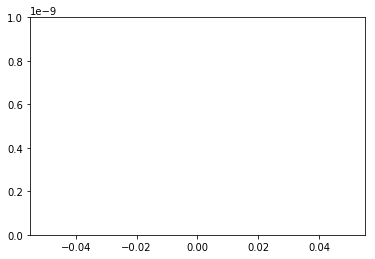

In [10]:
for i in xrange(40):
    plt.plot(exp3[i])
    
plt.ylim(0,1E-9)

TypeError: Invalid dimensions for image data

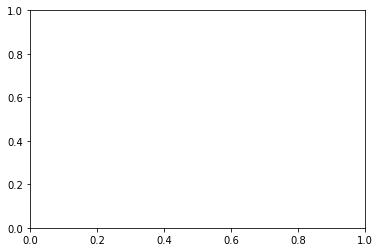

In [11]:
plt.imshow(exp3, aspect='auto',vmin=0,vmax=1E-9)
plt.colorbar()